<a href="https://colab.research.google.com/github/IanChoi2464/Machine-Learning-Colab/blob/main/7-3%20Training%20ANN%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공 신경망 모델을 훈련하는 모범 사례와 필요한 도구들을 살펴본다. 이런 도구들을 다뤄 보면서 텐서플로와 케라스 API에 더 익숙해진다.
# Keyword
**드롭아웃**: dropout, 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법, 드롭아웃은 훈련 중에 적용되며 평가나 예측에서는 적용하지 않음, 텐서플로는 이를 자동으로 처리함\
**콜백**: callback, 케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구, 대표적으로 최상의 모델을 자동으로 저장해 주거나 검증 점수가 더 이상 향상되지 않으면 일찍 종료할 수 있음\
**조기 종료**: 검증 점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법, 이렇게 하면 계산 비용과 시간을 절약할 수 있음\
# Function
### **Tensorflow**
**Dropout**: 드롭아웃 층\
첫 번째 매개변수로 드롭아웃 할 비율(r)을 지정, 드롭아웃 하지 않는 뉴런의 출력은 1/(1-r)만큼 증가시켜 출력의 총합이 같도록 만듦\
**save_weights()**: 모든 층의 가중치와 절편을 파일에 저장\
첫 번째 매개변수에 저장할 파일을 지정\
save_format 매개변수에서 저장할 파일 포맷을 지정, 기본적으로 텐서플로의 Checkpoint 포맷을 사용, 이 매개변수를 'h5'로 지정하거나 파일의 확장자가 '.h5'이면 HDF5 포맷으로 저장됨\
**load_weights()**: 모든 층의 가중치와 절편을 파일에 읽음\
첫 번째 매개변수에 읽을 파일을 지정\
**save()**: 모델 구조와 모든 가중치와 절편을 파일에 저장\
첫 번째 매개변수에 저장할 파일을 지정\
save_format 매개변수에서 저장할 파일 포맷을 지정, 기본적으로 텐서플로의 SavedModel 포맷을 사용, 이 매개변수를 'h5'로 지정하거나 파일의 확장자가 '.h5'이면 HDF5 포맷으로 저장됨\
**load_model()**: model.save()로 저장된 모델을 로드\
첫 번째 매개변수에 읽을 파일을 지정\
**ModelCheckpoint**: 케라스 모델과 가중치를 일정 간격으로 저장\
첫 번째 매개변수에 저장할 파일을 지정\
monitor 매개변수는 모니터링할 지표를 지정, 기본값은 'val_loss'로 검증 손실을 관찰\
save_weights_only 매개변수의 기본값은 False로 전체 모델을 저장, True로 지정하면 모델의 가중치와 절편만 저장\
save_best_only 매개변수를 True로 지정하면 가장 낮은 검증 점수를 만드는 모델을 저장\
**EarlyStopping**: 관심 지표가 더 이상 향상하지 않으면 훈련을 중지\
monitor 매개변수는 모니터링할 지표를 지정, 기본값은 'val_loss'로 검증 손실을 관찰\
patience 매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정\
restore_best_weights 매개변수에 최상의 모델 가중치를 복원할지 지정, 기본값은 False
### **Numpy**
**argmax**: 배열에서 축을 따라 최댓값의 인덱스를 반환\
axis 매개변수에서 어떤 축을 따라 최댓값을 찾을지 지정, 기본값은 None으로 전체 배열에서 최댓값을 찾음
# Tip
1. 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다.
2. load_model은 모델 파라미터뿐만 아니라 모델 구조와 옵티마이저 상태까지 모두 복원한다.

In [ ]:
"""이미지 데이터 준비하기"""
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
"""모델 만드는 함수"""
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss', 'accuracy'])


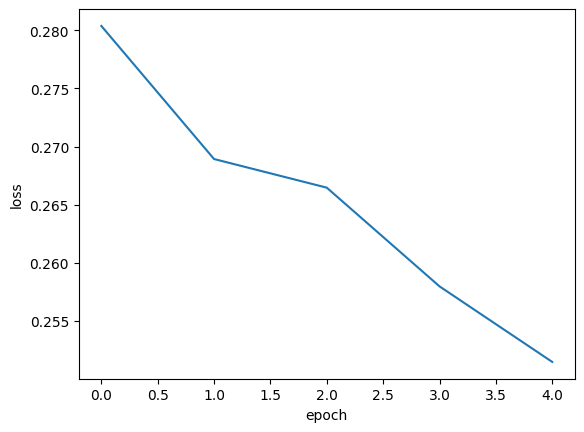

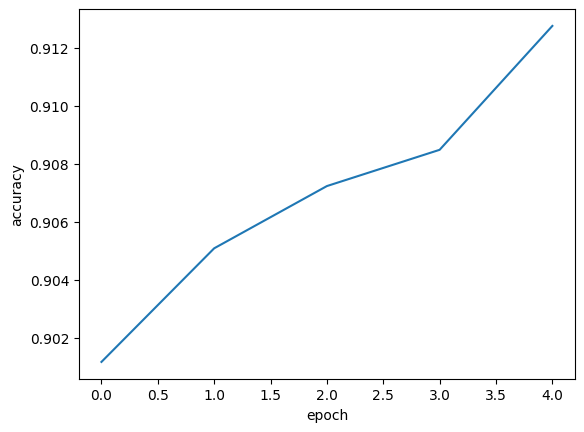

In [ ]:
"""history로 손실과 정확도 알아보기 - epoch=5"""
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

print(history.history.keys())

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

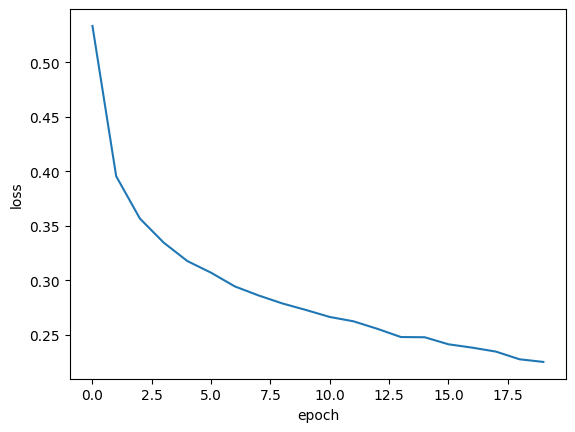

In [ ]:
"""history로 손실과 정확도 알아보기 - epoch=20"""
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


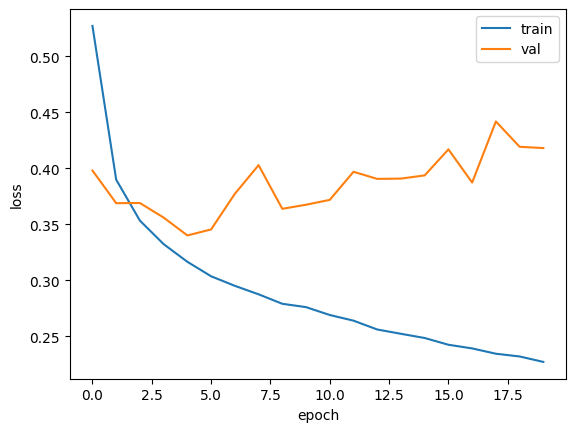

In [ ]:
"""검증 손실1."""
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target))

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


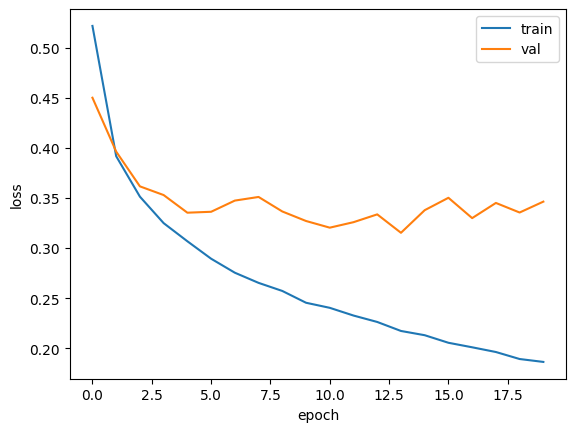

In [ ]:
"""검증 손실2. 옵티마이저 추가"""
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


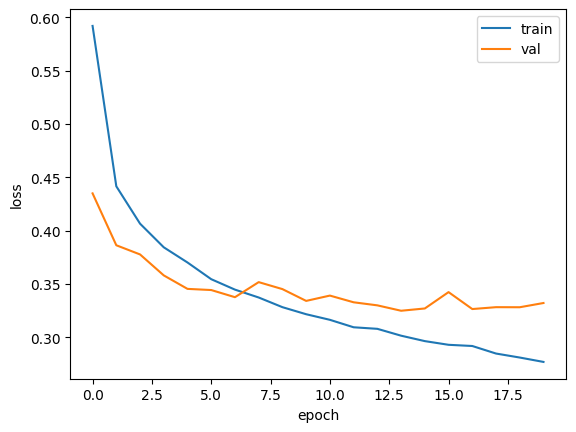

In [ ]:
"""검증 손실3. 드롭 아웃 추가"""
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
"""모델 저장과 복원1."""
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

model.save_weights('model-weights.h5')
model.save('model-whole.h5')

!ls -al *.h5

-rw-r--r-- 1 root root 333320 Sep 17 13:38 model-weights.h5
-rw-r--r-- 1 root root 981176 Sep 17 13:38 model-whole.h5


In [ ]:
"""모델 저장과 복원2."""
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

import numpy as np
def accuracy_fn(model, x, y):
  labels = np.argmax(model.predict(x), axis=-1)
  return np.mean(labels == y)

print(accuracy_fn(model, val_scaled, val_target))

model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step
0.8889166666666667
375/375 [==============================] - 1s 2ms/step - loss: 0.3171 - accuracy: 0.8889


[0.317112535238266, 0.8889166712760925]

In [ ]:
"""콜백1. ModelCheckpoint"""
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.8867


[0.319667786359787, 0.8867499828338623]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8


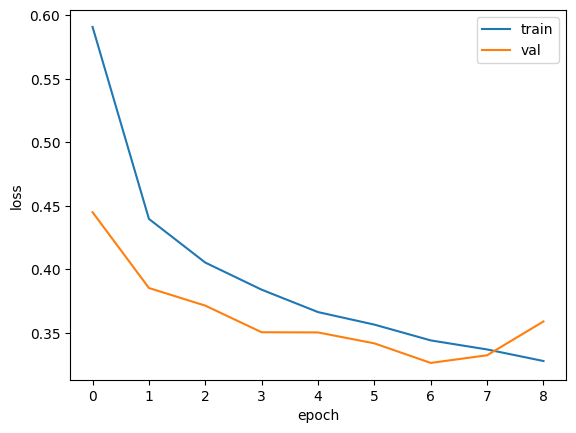

375/375 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8832


[0.326493501663208, 0.8831666707992554]

In [ ]:
"""콜백2. ModelCheckpoint + EarylyStopping"""
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

model.evaluate(val_scaled, val_target)